In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import iSDR_cython as ciSDR
np.random.seed(12)

In [12]:
results = dict()
results['RMS_J'] = []
results['RMS_M'] = []
results['AS'] = []
results['RMS_A'] = []
results['NC'] = []



gridsearch = {
    'l21_values':np.logspace(-2, 1, 10),
    'la_values':np.logspace(-3, 1, 10),
    'la_ratio_values':[1,0.98],
    'normalize':[0],
    'model_p':[1],
    'old_version':False,
    'normalize_Sstep':[0, 1],
    'normalize_Astep':[0],
    
    }




np.random.seed(40)
n_t = 200
n_c, n_s = 10, 40
m_p = 1
G = np.abs(np.random.normal(0,1,(n_c, n_s)))
for i in range(n_s):
    G[:, i] /= np.linalg.norm(G[:, i])
    
for ix in range(1, n_s//3):


    J = np.zeros((n_s, n_t))
    n_ac = 3
    J[ix*n_ac:(ix+1)*n_ac, 0] = [10, 0.1, 0]
    A = np.zeros((n_s, n_s))
    A[ix*n_ac:(ix+1)*n_ac, ix*n_ac:(ix+1)*n_ac] = np.array([[0.9,-0.4,0], [0.25, 0.97,0],[0.5,0,0.5]])
    for i in range(m_p, J.shape[-1]):
        J[:, i] = np.dot(A, J[:, i-1])




    SC = np.eye(n_s)
    iy = np.arange(ix*3, (ix+1)*3)
    for i in range(n_s//3):
        SC[i*3:(i+1)*3, i*3:(i+1)*3] = 1

    SC[ix*3:(ix+1)*3, ix*3:(ix+1)*3] = np.array([[1,1,1], [1,1,0],[1,0,1]])

    SC[:, :] = 1
    
    M = np.dot(G, J[:, m_p:])
    
    cl = ciSDR.eiSDR_cv(**gridsearch, verbose=True, max_run=500)
    df = cl.get_opt(G, M, SC)
    
    
    
    
    clf = ciSDR.linear_model.iSDR(l21_ratio=df.ls_reg.values[0],
                                  la=[df.la_reg_a.values[0], df.la_reg_r.values[0]],
                                  normalize_Astep=df.normalize_Astep.values[0],
                                  normalize_Sstep=df.normalize_Sstep.values[0],
                                  old_version=False,
                                  verbose=0)
    clf.solver(G, M, SC, model_p=df.p.values[0], A=None, normalize=df.normalize.values[0])
    
    
    
    R = clf.coef_
    Jx = np.zeros((J.shape[0], R.shape[1]))
    Jx[clf.active_set[-1], :] = R
    rms_J = 100*np.linalg.norm(Jx - J[:, :-m_p]) / np.linalg.norm(J[:, :-m_p])
    rms_M = 100*np.linalg.norm(np.dot(G, Jx - J[:, :-m_p]))/ np.linalg.norm(M)
    nbr_ac = len(clf.active_set[-1])
    Ax = np.zeros((n_s, n_s*m_p))
    for i in range(nbr_ac):
        for j in range(nbr_ac):
            for k in range(df.p.values[0]):
                Ax[clf.active_set[-1][i], clf.active_set[-1][j] + k*n_s] = clf.Acoef_[i, j + k*nbr_ac]


    rms_A = 100*np.sum(np.abs(np.sort(np.linalg.eigvals(A)) - np.sort(np.linalg.eigvals(Ax)))) / np.sum(np.abs(np.sort(np.linalg.eigvals(A))))

    nbr_coef = 100* (1 - np.sum(np.abs(Ax)>0)/ np.sum(np.abs(A)>0))
    results['RMS_J'].append(rms_J)
    results['RMS_M'].append(rms_M)
    results['AS'].append(100*(1-nbr_ac/n_ac))
    results['RMS_A'].append(rms_A)
    results['NC'].append(nbr_coef)
    print(rms_J, rms_M, 100*(1-nbr_ac/n_ac), rms_A, nbr_coef)
results = pd.DataFrame(results)

Total number of combination 400
Successfully created the directory /tmp/tmp_b3bf5361-7dda-4a3b-8f0b-a69cb2ca11e0 


 48%|████▊     | 193/400 [00:44<01:09,  2.97it/s]/Users/EEALBRB/workspace/cython_project/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 952.5969123854538, tolerance: 597.5482906909936
  positive)
100%|██████████| 400/400 [01:22<00:00,  4.87it/s]


Successfully deleted the directory /tmp/tmp_b3bf5361-7dda-4a3b-8f0b-a69cb2ca11e0
3.0941058807077457 2.7138715356113923 0.0 3.6663842557289428 -50.0
Total number of combination 400
Successfully created the directory /tmp/tmp_e8005b96-88c0-4719-84ff-f9cb911d06dc 


100%|██████████| 400/400 [01:43<00:00,  3.88it/s]


Successfully deleted the directory /tmp/tmp_e8005b96-88c0-4719-84ff-f9cb911d06dc
22.239435079708493 16.808035543797846 0.0 4.30768906966805 -16.666666666666675
Total number of combination 400
Successfully created the directory /tmp/tmp_a9350921-919b-4f40-b290-ae3392e27bb6 


100%|██████████| 400/400 [01:13<00:00,  5.41it/s]


Successfully deleted the directory /tmp/tmp_a9350921-919b-4f40-b290-ae3392e27bb6
3.786224612904568 2.731998947250983 0.0 5.229232633246839 -16.666666666666675
Total number of combination 400
Successfully created the directory /tmp/tmp_54503588-8e82-4937-99b4-9804647949a3 


100%|██████████| 400/400 [01:48<00:00,  3.69it/s]


Successfully deleted the directory /tmp/tmp_54503588-8e82-4937-99b4-9804647949a3
62.38305063881835 66.34945112893189 0.0 7.2906686279617805 -33.33333333333333
Total number of combination 400
Successfully created the directory /tmp/tmp_10821bab-3427-47a7-8c68-6f6e9e6aa89d 


100%|██████████| 400/400 [01:19<00:00,  5.03it/s]


Successfully deleted the directory /tmp/tmp_10821bab-3427-47a7-8c68-6f6e9e6aa89d
3.086602384085214 2.704872006989348 0.0 3.6698834237939884 -50.0
Total number of combination 400
Successfully created the directory /tmp/tmp_5184cc76-007d-4407-a25c-bf0187840ee5 


100%|██████████| 400/400 [01:15<00:00,  5.32it/s]


Successfully deleted the directory /tmp/tmp_5184cc76-007d-4407-a25c-bf0187840ee5
3.8414587217471894 3.5467046262815347 0.0 3.911840309155293 -50.0
Total number of combination 400
Successfully created the directory /tmp/tmp_71456e79-7970-4e54-8f5c-70a2d6cd0f19 


100%|██████████| 400/400 [01:34<00:00,  4.25it/s]


Successfully deleted the directory /tmp/tmp_71456e79-7970-4e54-8f5c-70a2d6cd0f19
33.92538585855498 18.225578064015714 -33.33333333333333 9.237531378008786 -100.0
Total number of combination 400
Successfully created the directory /tmp/tmp_c9518737-b124-4756-a23d-e03d0648a719 


100%|██████████| 400/400 [01:30<00:00,  4.44it/s]


Successfully deleted the directory /tmp/tmp_c9518737-b124-4756-a23d-e03d0648a719
131.76500561770368 32.11881361197646 0.0 3.9481687818642377 -16.666666666666675
Total number of combination 400
Successfully created the directory /tmp/tmp_24a8bc19-441f-4710-ac1e-56abb62bd7a0 


100%|██████████| 400/400 [01:31<00:00,  4.38it/s]


Successfully deleted the directory /tmp/tmp_24a8bc19-441f-4710-ac1e-56abb62bd7a0
2.918331883269577 2.2889987010213555 0.0 4.052489012968049 -50.0
Total number of combination 400
Successfully created the directory /tmp/tmp_cbde08e8-d581-4cba-8f01-a882edf988d2 


100%|██████████| 400/400 [01:26<00:00,  4.65it/s]


Successfully deleted the directory /tmp/tmp_cbde08e8-d581-4cba-8f01-a882edf988d2
14.149063253660806 6.8821617389914875 0.0 1.5737957977051737 -33.33333333333333
Total number of combination 400
Successfully created the directory /tmp/tmp_d925e251-6d27-479e-a672-698e2c533602 


 65%|██████▌   | 260/400 [01:08<00:41,  3.35it/s]/Users/EEALBRB/workspace/cython_project/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.60067325007842, tolerance: 129.661110059336
  positive)
100%|██████████| 400/400 [01:45<00:00,  3.77it/s]


Successfully deleted the directory /tmp/tmp_d925e251-6d27-479e-a672-698e2c533602
77.25575476101744 24.110679281224 0.0 5.748891214784087 0.0
Total number of combination 400
Successfully created the directory /tmp/tmp_dce38a6c-12dd-4aa9-bed5-bafe736667b2 


 12%|█▏        | 46/400 [00:16<03:07,  1.88it/s]/Users/EEALBRB/workspace/cython_project/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1659929494737593, tolerance: 0.30716540105224793
  positive)
 61%|██████▏   | 245/400 [01:03<01:06,  2.33it/s]/Users/EEALBRB/workspace/cython_project/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5207461466766263, tolerance: 0.30716540105224793
  positive)
100%|██████████| 400/400 [01:34<00:00,  4.22it/s]


Successfully deleted the directory /tmp/tmp_dce38a6c-12dd-4aa9-bed5-bafe736667b2
2.4135786316929906 1.7870710419503277 0.0 3.728058185341663 -16.666666666666675


In [15]:
print(clf.active_set[-1])
print(np.arange(ix*3, (ix+1)*3))

[36 37 38]
[36 37 38]


In [16]:
results

,RMS_J,RMS_M,AS,RMS_A,NC
0,3.094106,2.713872,0.000000,3.666384,-50.000000
1,22.239435,16.808036,0.000000,4.307689,-16.666667
2,3.786225,2.731999,0.000000,5.229233,-16.666667
3,62.383051,66.349451,0.000000,7.290669,-33.333333
4,3.086602,2.704872,0.000000,3.669883,-50.000000
5,3.841459,3.546705,0.000000,3.911840,-50.000000
6,33.925386,18.225578,-33.333333,9.237531,-100.000000
7,131.765006,32.118814,0.000000,3.948169,-16.666667
8,2.918332,2.288999,0.000000,4.052489,-50.000000
9,14.149063,6.882162,0.000000,1.573796,-33.333333


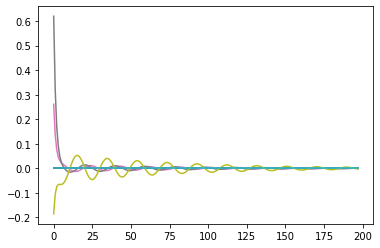

In [17]:
plt.plot(Jx[:, 1:].T - J[:, 1:-1].T);

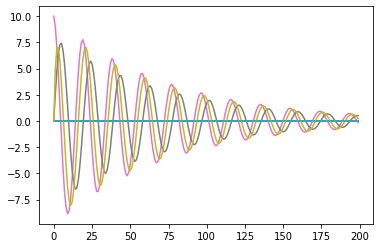

In [14]:
plt.plot(J[:, :].T);

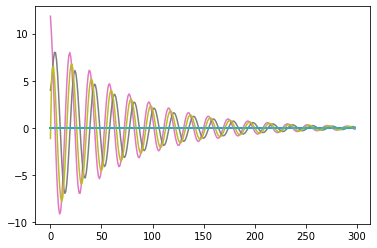

In [59]:
plt.plot(Jx[:, :].T);

In [60]:
clf.active_set[-1]

array([6, 7, 8])

In [61]:
100*np.linalg.norm(Jx[:, :].T - J[:, 1:].T)/np.linalg.norm(J[:, 1:].T)

33.779158139840995